In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
AppData=pd.read_csv("application_data.csv")
PrevApp=pd.read_csv("previous_application.csv")
AppData.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
AppData.shape

(307511, 122)

Some coloumns have values which can be replaced with better suiting words. 

In [4]:
AppData["Education"]= AppData["NAME_EDUCATION_TYPE"].apply(lambda x: x.replace("Secondary / secondary special","Secondary"))
AppData.drop("NAME_EDUCATION_TYPE",axis=1,inplace=True)

In [5]:
AppData["Marital"]= AppData["NAME_FAMILY_STATUS"].apply(lambda x: x.replace("Single / not married","Single"))
AppData.drop("NAME_FAMILY_STATUS",axis=1,inplace=True)

In [6]:
AppData["Housing"]= AppData["NAME_HOUSING_TYPE"].apply(lambda x: x.replace("House / apartment","House"))
AppData.drop("NAME_HOUSING_TYPE",axis=1,inplace=True)

In [7]:
AppData.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Education,Marital,Housing
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,Secondary,Single,House
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,Higher education,Married,House
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,Secondary,Single,House
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,Secondary,Civil marriage,House
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,Secondary,Single,House


In [8]:
pd.set_option("display.max_columns",150)
pd.set_option("display.max_rows",150)

In [9]:
AppData.isnull().sum()   

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE                           0
FLAG_EMAIL                           0
OCCUPATION_TYPE          

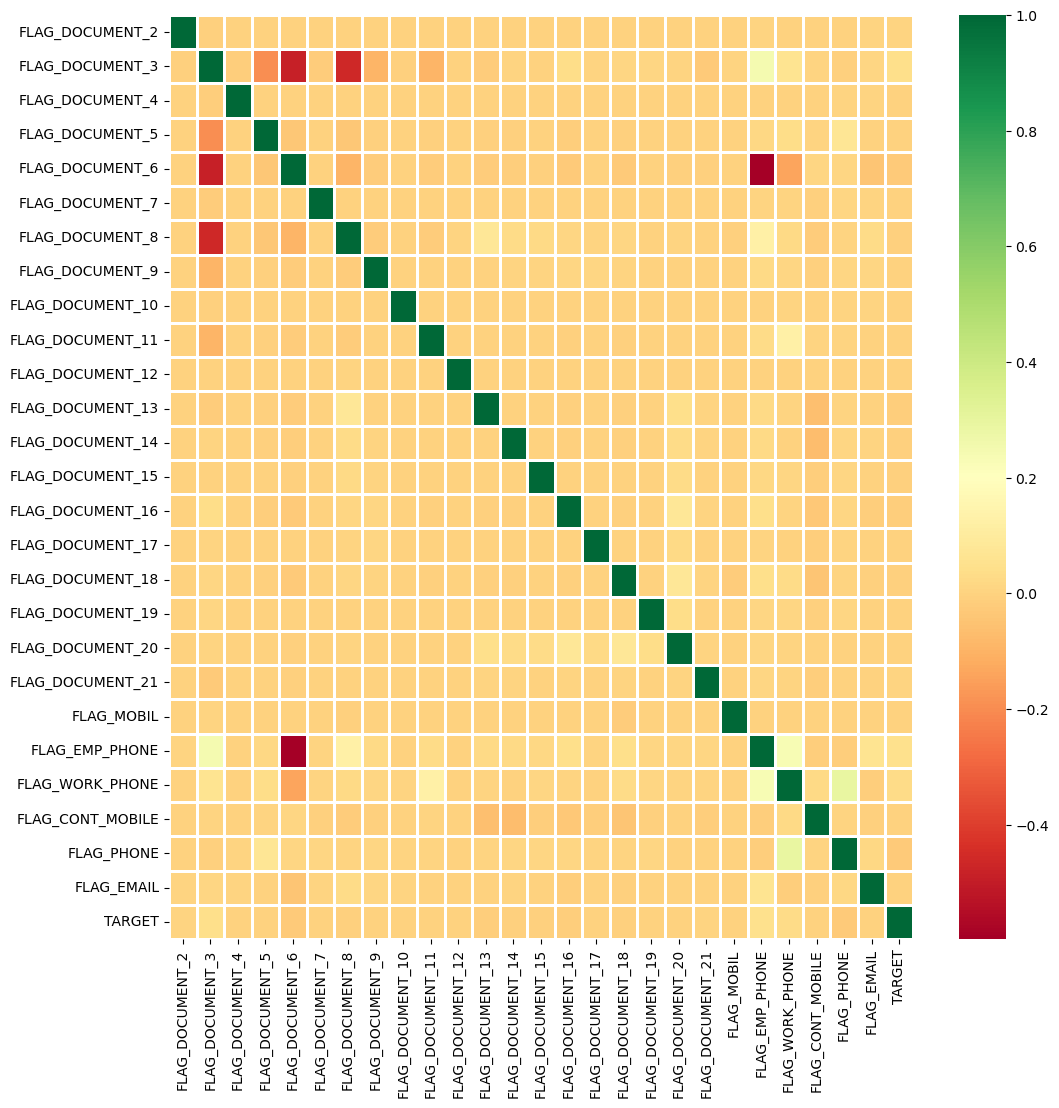

In [10]:
flag=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','TARGET']
flag_corr = AppData[flag].corr()
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(flag_corr, xticklabels=flag_corr.columns, yticklabels=flag_corr.columns,cmap ="RdYlGn",linewidth=1)

The Heatmap shows that there is little to no correlation of most of the Flag Documents to the Target variable. So we can remove them to make the analysis more crisp. 

In [11]:
flag_1=[ 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']

In [12]:
for fl in flag_1:
    AppData.drop(fl,axis=1,inplace=True)

In [13]:
AppData.isnull().sum() / AppData.shape[0] * 100.00 

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
CNT_FAM_MEMBERS                  0.000650
REGION_RATING_CLIENT             0.000000
REGION_RATING_CLIENT_W_CITY      0.000000
WEEKDAY_APPR_PROCESS_START       0

The coloumns with null values more than 40% null values should be removed for calculation to be crisp. 

In [14]:
AppData.drop("TOTALAREA_MODE",axis=1,inplace=True)
AppData.drop("HOUSETYPE_MODE",axis=1,inplace=True)

In [15]:
AppData.drop("FONDKAPREMONT_MODE",axis=1,inplace=True)
AppData.drop("NONLIVINGAREA_MEDI",axis=1,inplace=True)
AppData.drop("NONLIVINGAPARTMENTS_MEDI",axis=1,inplace=True)
AppData.drop("LIVINGAPARTMENTS_MEDI",axis=1,inplace=True)
AppData.drop("LANDAREA_MEDI",axis=1,inplace=True)
AppData.drop("FLOORSMIN_MEDI",axis=1,inplace=True)
AppData.drop("FLOORSMAX_MEDI",axis=1,inplace=True)
AppData.drop("ENTRANCES_MEDI",axis=1,inplace=True)
AppData.drop("ELEVATORS_MEDI",axis=1,inplace=True)
AppData.drop("COMMONAREA_MEDI",axis=1,inplace=True)
AppData.drop("YEARS_BUILD_MEDI",axis=1,inplace=True)
AppData.drop("YEARS_BEGINEXPLUATATION_MEDI",axis=1,inplace=True)

In [16]:
AppData.drop("NONLIVINGAREA_MODE",axis=1,inplace=True)
AppData.drop("NONLIVINGAPARTMENTS_MODE",axis=1,inplace=True)
AppData.drop("LIVINGAREA_MODE",axis=1,inplace=True)
AppData.drop("LIVINGAPARTMENTS_MODE",axis=1,inplace=True)
AppData.drop("LANDAREA_MODE",axis=1,inplace=True)
AppData.drop("FLOORSMIN_MODE",axis=1,inplace=True)
AppData.drop("FLOORSMAX_MODE",axis=1,inplace=True)
AppData.drop("ENTRANCES_MODE",axis=1,inplace=True)
AppData.drop("ELEVATORS_MODE",axis=1,inplace=True)

In [17]:
PrevApp.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [18]:
null_values_Prev=PrevApp.isnull().sum() / PrevApp.shape[0] * 100.00
null_values_Prev

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [19]:
Remove_Prev_App=["AMT_DOWN_PAYMENT","RATE_DOWN_PAYMENT","RATE_INTEREST_PRIMARY","RATE_INTEREST_PRIVILEGED","NAME_TYPE_SUITE","DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION","NFLAG_INSURED_ON_APPROVAL"]

In [20]:
for col in Remove_Prev_App:
    PrevApp.drop(col,axis=1,inplace=True)

# Replacing the Null Values wherever needed. 

In [21]:
AppData.AMT_REQ_CREDIT_BUREAU_DAY.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [22]:
AppData.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [23]:
AppData.AMT_REQ_CREDIT_BUREAU_MON.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [24]:
AppData.AMT_REQ_CREDIT_BUREAU_QRT.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [25]:
AppData.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

The null values of AMT_REQ_CREDIT_BUREAU_HOUR/DAY/MON/QRT/WEEK/YEAR must be filled with the mode of the data.

In [26]:
AppData.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(AppData.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace=True)
AppData.AMT_REQ_CREDIT_BUREAU_DAY.fillna(AppData.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace=True)
AppData.AMT_REQ_CREDIT_BUREAU_MON.fillna(AppData.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace=True)
AppData.AMT_REQ_CREDIT_BUREAU_QRT.fillna(AppData.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace=True)
AppData.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(AppData.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace=True)
AppData.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(AppData.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace=True)

In [27]:
AppData.isnull().sum()  

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
REGION_RATING_CLIENT                 0
REGION_RATING_CLIENT_W_CITY          0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
REG_REGION_NOT_LIVE_REGIO

In [28]:
AppData.OCCUPATION_TYPE.isnull().sum()   

96391

In [29]:
AppData.OCCUPATION_TYPE.mode()[0] 

'Laborers'

In [30]:
AppData.OCCUPATION_TYPE.fillna(AppData.OCCUPATION_TYPE.mode()[0],inplace=True)  

In [31]:
AppData.OCCUPATION_TYPE.isnull().sum()

0

In [32]:
AppData.OWN_CAR_AGE.value_counts(normalize=True)       ## It is visible that the mode for this coloumn is 7.0.

7.0     0.070987
6.0     0.061024
3.0     0.060909
8.0     0.056291
2.0     0.055956
4.0     0.053135
1.0     0.050487
9.0     0.048001
10.0    0.045954
14.0    0.043927
13.0    0.043660
12.0    0.040705
11.0    0.039787
5.0     0.034375
15.0    0.034232
16.0    0.032080
17.0    0.027720
64.0    0.023360
18.0    0.023121
0.0     0.020405
19.0    0.017823
20.0    0.014601
21.0    0.013979
22.0    0.011952
24.0    0.010996
23.0    0.010203
65.0    0.008520
25.0    0.008271
26.0    0.005546
28.0    0.005183
27.0    0.004618
29.0    0.003796
30.0    0.003117
31.0    0.002553
32.0    0.001989
34.0    0.001750
35.0    0.001501
33.0    0.001262
36.0    0.001186
38.0    0.000928
40.0    0.000813
39.0    0.000746
37.0    0.000717
41.0    0.000555
42.0    0.000402
44.0    0.000201
43.0    0.000182
54.0    0.000115
45.0    0.000105
49.0    0.000057
46.0    0.000048
55.0    0.000038
51.0    0.000029
91.0    0.000019
63.0    0.000019
56.0    0.000010
57.0    0.000010
69.0    0.000010
50.0    0.0000

In [33]:
AppData.OWN_CAR_AGE.mode()[0]

7.0

In [34]:
AppData.OWN_CAR_AGE.fillna(AppData.OWN_CAR_AGE.mode()[0],inplace=True)

In [35]:
AppData.OWN_CAR_AGE.isnull().sum()

0

In [36]:
AppData.AMT_ANNUITY.mode()[0]

9000.0

In [37]:
AppData.AMT_ANNUITY.fillna(AppData.AMT_ANNUITY.mode()[0],inplace=True)
AppData.CNT_FAM_MEMBERS.fillna(AppData.CNT_FAM_MEMBERS.mode()[0],inplace=True)

In [38]:
AppData.AMT_GOODS_PRICE.mean()

538396.2074288895

In [39]:
AppData.AMT_GOODS_PRICE.agg([min,max,"median"])  

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

 The mean, median and the max value have a lot of difference between them which means the data has outliers.

In [40]:
AppData.AMT_GOODS_PRICE.fillna(AppData.AMT_GOODS_PRICE.median(),inplace=True)

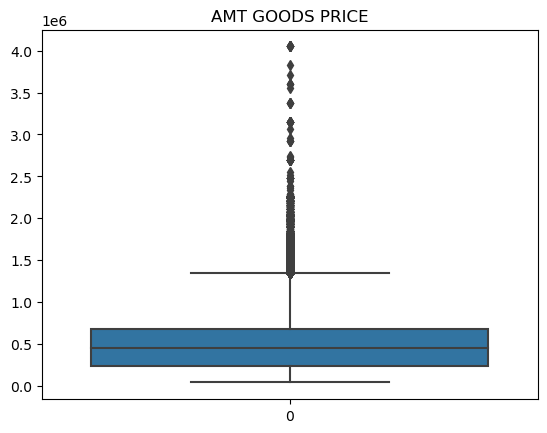

In [41]:
sns.boxplot(data=AppData.AMT_GOODS_PRICE)
plt.title("AMT GOODS PRICE")
plt.show()

The boxplot shown above confirms the presence of Outliers in the coloumn. 

# Binning the variables

1. PRICE OF THE GOODS:

In [42]:
AppData.AMT_GOODS_PRICE.quantile([0.1,0.25,0.5,0.75,0.99])  

0.10     180000.0
0.25     238500.0
0.50     450000.0
0.75     679500.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [43]:
AppData.AMT_GOODS_PRICE.max() 

4050000.0

In [44]:
bins=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
ranges= ["0-100000","100000-200000","200000-300000","300000-400000","400000-500000","500000-600000","600000-700000","700000-800000","800000-900000","Above 90000"]
AppData["AMT_GOODS_PRICE_R"]=pd.cut(AppData.AMT_GOODS_PRICE,bins,labels=ranges)
AppData['AMT_GOODS_PRICE_R'].value_counts(normalize=True)*100

200000-300000    20.409351
400000-500000    18.617545
Above 90000      13.619025
600000-700000    13.015469
100000-200000    10.717015
800000-900000     6.986417
300000-400000     6.900241
500000-600000     4.265538
0-100000          2.832094
700000-800000     2.637304
Name: AMT_GOODS_PRICE_R, dtype: float64

2. AMOUNT OF LOAN GIVEN:

In [45]:
AppData.AMT_CREDIT.quantile([0.1,0.25,0.5,0.75,0.99]) 

0.10     180000.0
0.25     270000.0
0.50     513531.0
0.75     808650.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [46]:
AppData.AMT_CREDIT.max()  

4050000.0

The conclusions seen from binning the variables are mentioned in the PPT submitted. 

In [47]:
bin=[0,150000,300000,450000,600000,750000,1000000,4050000]
ranges1= ["0-150000","150000-300000","300000-450000","450000-600000","600000-750000","750000-1000000","Above 1000000"]
AppData["AMT_CREDIT_R"]=pd.cut(AppData.AMT_CREDIT,bin,labels=ranges1)
AppData["AMT_CREDIT_R"].value_counts(normalize=True)*100

150000-300000     23.673299
Above 1000000     16.254703
450000-600000     15.619279
300000-450000     14.496067
750000-1000000    14.015434
600000-750000     10.036064
0-150000           5.905155
Name: AMT_CREDIT_R, dtype: float64

3. AMOUNT OF THE ANNUITY:

In [48]:
AppData.AMT_ANNUITY.quantile([0.1,0.25,0.5,0.75,0.99])  

0.10    11074.5
0.25    16524.0
0.50    24903.0
0.75    34596.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

In [49]:
AppData.AMT_ANNUITY.max()

258025.5

In [50]:
bin=[0,5000,10000,15000,20000,25000,30000,35000,258025.5]
ranges1= ["0-5000","5000-10000","10000-15000","15000-20000","20000-25000","25000-30000","30000-35000","Above 35000"]
AppData["AMT_ANNUITY_R"]=pd.cut(AppData.AMT_ANNUITY,bin,labels=ranges1)
AppData["AMT_ANNUITY_R"].value_counts(normalize=True)*100

Above 35000    24.343845
20000-25000    15.726917
25000-30000    14.342251
15000-20000    13.926331
10000-15000    13.136766
30000-35000    10.948551
5000-10000      7.204295
0-5000          0.371044
Name: AMT_ANNUITY_R, dtype: float64

4. TOTAL INCOME:

In [51]:
AppData.AMT_INCOME_TOTAL.quantile([0.1,0.25,0.5,0.75,0.99])  

0.10     81000.0
0.25    112500.0
0.50    147150.0
0.75    202500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

major difference between 0.1 and 0.25 percentile so there is a need to check the other percentiles.

In [52]:
AppData.AMT_INCOME_TOTAL.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99])

0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    147150.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [53]:
AppData.AMT_INCOME_TOTAL.max()

117000000.0

In [54]:
bin=[0,100000,150000,200000,250000,300000,350000,400000,117000000]
ranges1= ["0-100000","100000-150000","150000-200000","200000-250000","250000-300000","300000-350000","350000-400000","Above 400000"]
AppData["AMT_INCOME_TOTAL_R"]=pd.cut(AppData.AMT_INCOME_TOTAL,bin,labels=ranges1)
AppData["AMT_INCOME_TOTAL_R"].value_counts(normalize=True)*100

100000-150000    29.784626
150000-200000    20.912097
0-100000         20.714056
200000-250000    15.653749
250000-300000     5.540940
300000-350000     2.885750
Above 400000      2.622020
350000-400000     1.886762
Name: AMT_INCOME_TOTAL_R, dtype: float64

On inspection it is seen that some variables have a negative sign before the values. It is important to change their sign before moving in with the analysis.

In [55]:
AppData.DAYS_EMPLOYED=(abs(AppData.DAYS_EMPLOYED))
AppData.DAYS_BIRTH=(abs(AppData.DAYS_BIRTH))
AppData.DAYS_REGISTRATION=(abs(AppData.DAYS_REGISTRATION))
AppData.DAYS_ID_PUBLISH=(abs(AppData.DAYS_ID_PUBLISH))

In [56]:
AppData.DAYS_EMPLOYED.quantile([0.1,0.25,0.5,0.75,0.99])

0.10       392.0
0.25       933.0
0.50      2219.0
0.75      5707.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [57]:
AppData.DAYS_EMPLOYED.max()

365243

In [58]:
bin=[0,500,1000,1500,3000,4000,5000,6000,365243]
ranges1= ["0-500","500-1000","1000-1500","1500-3000","3000-4000","4000-50000","50000-60000","Above 6000"]
AppData["DAYS_EMPLOYED_R"]=pd.cut(AppData.DAYS_EMPLOYED,bin,labels=ranges1)
AppData["DAYS_EMPLOYED_R"].value_counts(normalize=True)*100

Above 6000     24.382051
1500-3000      21.579531
500-1000       13.504971
0-500          13.224654
1000-1500      11.323246
3000-4000       8.089519
4000-50000      4.731244
50000-60000     3.164785
Name: DAYS_EMPLOYED_R, dtype: float64

In [59]:
AppData.DAYS_BIRTH.quantile([0.1,0.25,0.5,0.75,0.99])

0.10    10284.0
0.25    12413.0
0.50    15750.0
0.75    19682.0
0.99    24419.0
Name: DAYS_BIRTH, dtype: float64

In [60]:
AppData.DAYS_BIRTH.max() 

25229

In [61]:
bin=[0,5000,10000,15000,20000,25000,30000]
ranges1= ["0-5000","5000-10000","10000-15000","15000-20000","20000-25000","Above 25000"]
AppData["DAYS_BIRTH_R"]=pd.cut(AppData.DAYS_BIRTH,bin,labels=ranges1)
AppData["DAYS_BIRTH_R"].value_counts(normalize=True)*100

10000-15000    36.633486
15000-20000    32.669400
20000-25000    22.765690
5000-10000      7.827687
Above 25000     0.103736
0-5000          0.000000
Name: DAYS_BIRTH_R, dtype: float64

# UNIVARIATE ANALYSIS ON CATEGORICAL VARIABLES.

The conclusions are mentioned in the PPT submitted. 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


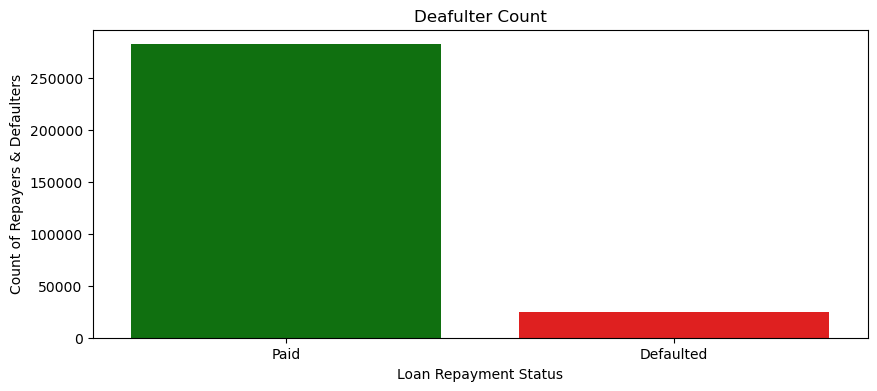

In [62]:
IMBALANCE = AppData["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['Paid','Defaulted']
sns.barplot(x,"TARGET",data = IMBALANCE,palette= ['green','red'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Deafulter Count")
plt.show()

In [63]:
count_0 = IMBALANCE.iloc[0]["TARGET"]
count_1 = IMBALANCE.iloc[1]["TARGET"]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)

print('Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: %.2f and %.2f'%(count_0_perc,count_1_perc))
print('Ratios of imbalance in relative with respect to Repayer and Defaulter datas is %.2f : 1 (approx)'%(count_0/count_1))

Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: 91.93 and 8.07
Ratios of imbalance in relative with respect to Repayer and Defaulter datas is 11.39 : 1 (approx)


In [64]:
AppData.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [65]:
perc=AppData.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean()*100
perc

NAME_CONTRACT_TYPE
Cash loans         8.345913
Revolving loans    5.478329
Name: TARGET, dtype: float64

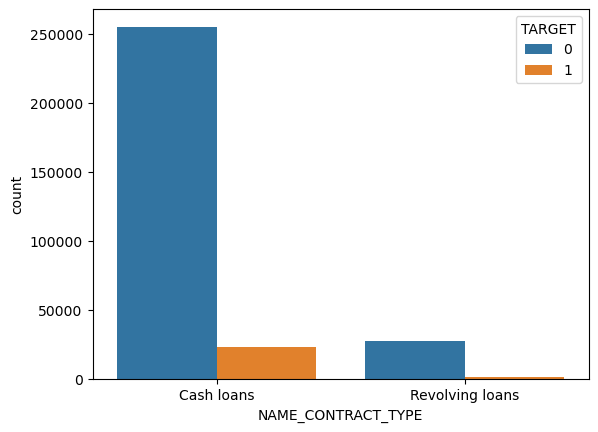

In [66]:
sns.countplot(data=AppData,x="NAME_CONTRACT_TYPE",hue="TARGET")
plt.show()

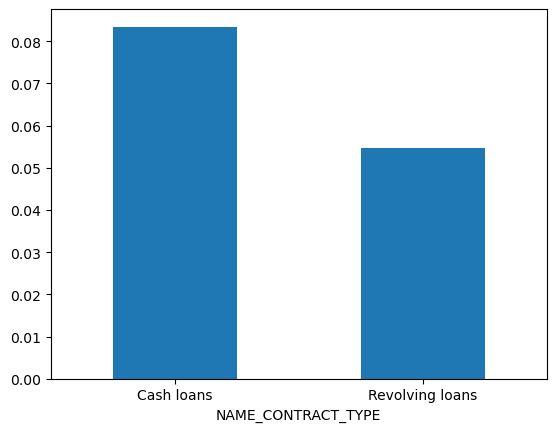

In [67]:
AppData.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean().plot.bar()     
plt.xticks(rotation=360)
plt.show()

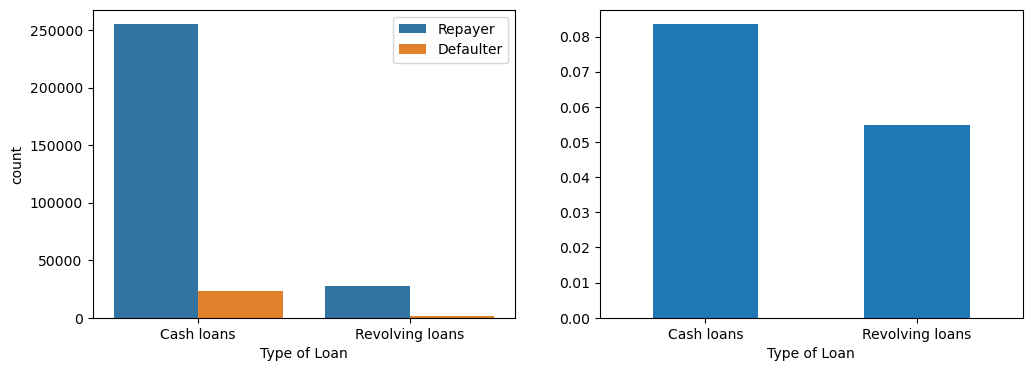

In [68]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=AppData,x="NAME_CONTRACT_TYPE",hue="TARGET")    
plt.xticks(rotation=360)
plt.xlabel("Type of Loan")
plt.legend(['Repayer','Defaulter'])

plt.subplot(1,2,2)
AppData.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean().plot.bar() 
plt.xticks(rotation=360)
plt.xlabel("Type of Loan")
plt.show()

In [69]:
perc1=AppData.groupby("CODE_GENDER")['TARGET'].mean()*100
perc1

CODE_GENDER
F       6.999328
M      10.141920
XNA     0.000000
Name: TARGET, dtype: float64

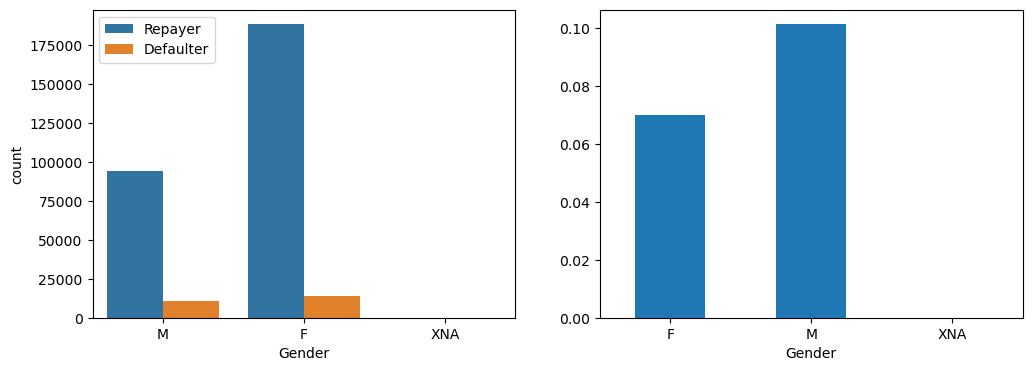

In [70]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=AppData,x="CODE_GENDER",hue="TARGET")
plt.xticks(rotation=360)
plt.xlabel("Gender")
plt.legend(['Repayer','Defaulter'])
plt.subplot(1,2,2)
AppData.groupby('CODE_GENDER')['TARGET'].mean().plot.bar()     
plt.xticks(rotation=360)
plt.xlabel("Gender")
plt.show()

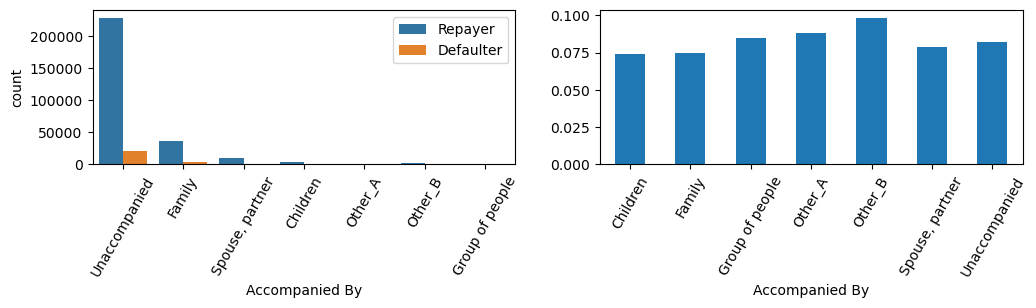

In [71]:
plt.figure(figsize=(12,2))
plt.subplot(1,2,1)
sns.countplot(data=AppData,x="NAME_TYPE_SUITE",hue="TARGET")
plt.xticks(rotation=60)
plt.xlabel("Accompanied By")
plt.legend(['Repayer','Defaulter'])
plt.subplot(1,2,2)
AppData.groupby('NAME_TYPE_SUITE')['TARGET'].mean().plot.bar()     
plt.xticks(rotation=60)
plt.xlabel("Accompanied By")
plt.show()

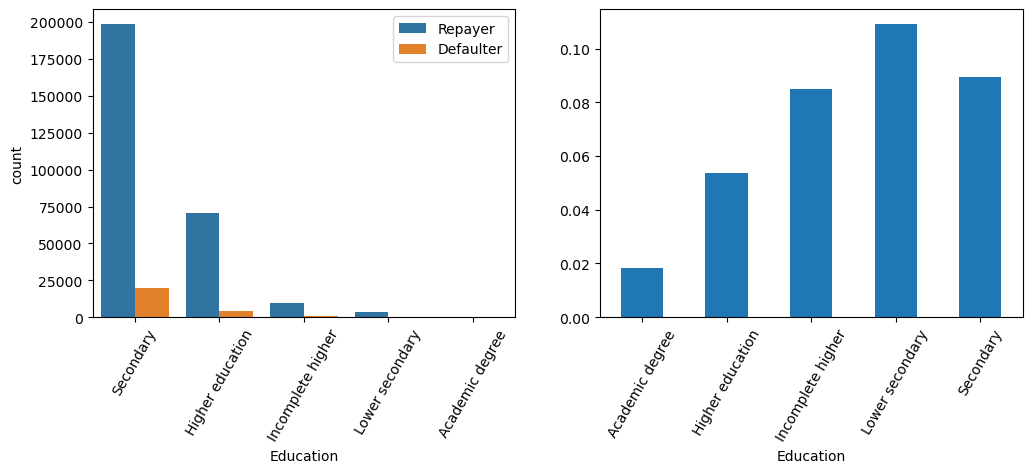

In [72]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=AppData,x="Education",hue="TARGET")
plt.xticks(rotation=60)
plt.legend(['Repayer','Defaulter'])
plt.subplot(1,2,2)
AppData.groupby("Education")['TARGET'].mean().plot.bar()     
plt.xticks(rotation=60)
plt.show()

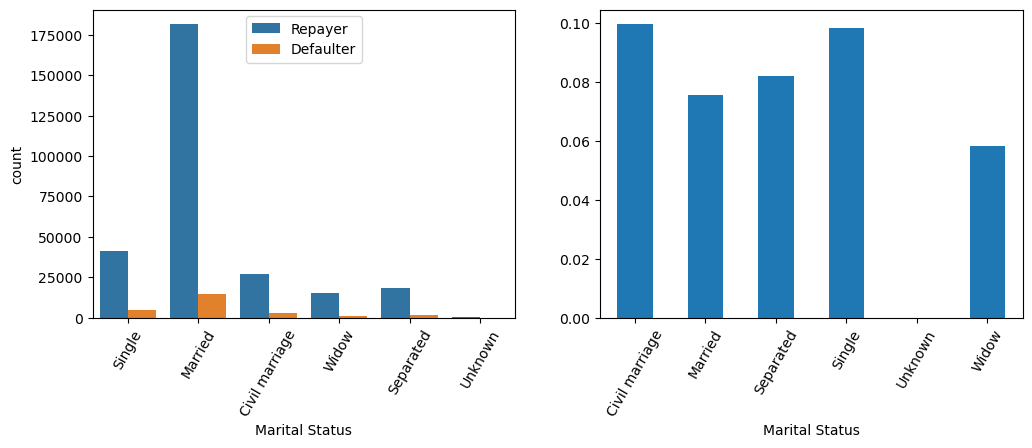

In [73]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=AppData,x="Marital",hue="TARGET")
plt.xticks(rotation=60)
plt.xlabel("Marital Status")
plt.legend(['Repayer','Defaulter'])
plt.subplot(1,2,2)
AppData.groupby("Marital")['TARGET'].mean().plot.bar()     
plt.xticks(rotation=60)
plt.xlabel("Marital Status")
plt.show()

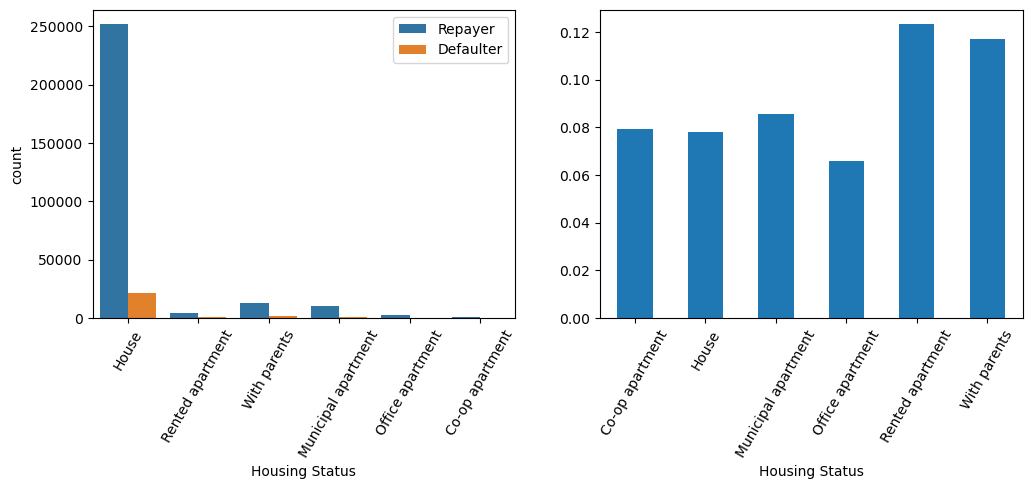

In [74]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=AppData,x="Housing",hue="TARGET")
plt.xticks(rotation=60)
plt.xlabel("Housing Status")
plt.legend(['Repayer','Defaulter'])
plt.subplot(1,2,2)
AppData.groupby("Housing")['TARGET'].mean().plot.bar()  
plt.xlabel("Housing Status")
plt.xticks(rotation=60)
plt.show()

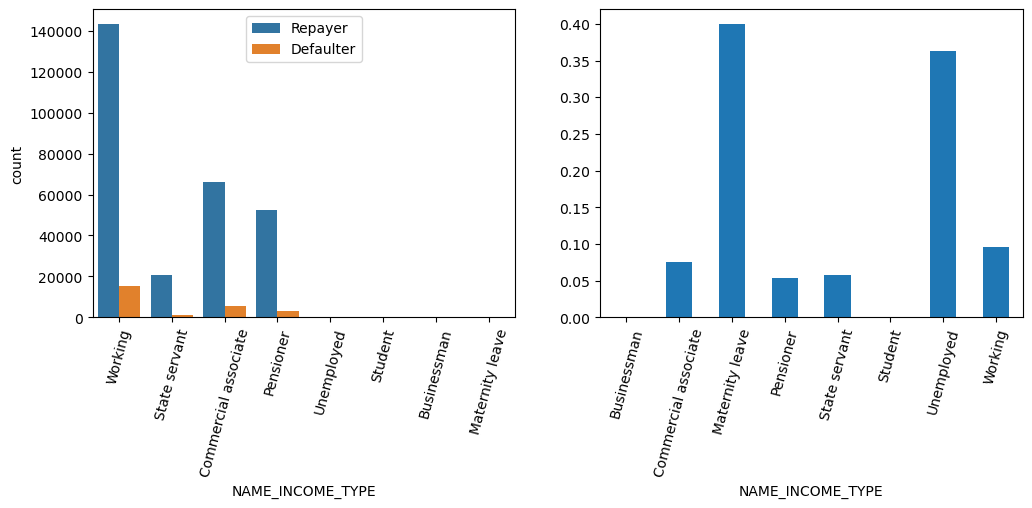

In [75]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=AppData,x="NAME_INCOME_TYPE",hue="TARGET")
plt.xticks(rotation=75)
plt.legend(['Repayer','Defaulter'])
plt.subplot(1,2,2)
AppData.groupby("NAME_INCOME_TYPE")['TARGET'].mean().plot.bar()     
plt.xticks(rotation=75)
plt.show()

In [76]:
perc2=AppData.groupby("NAME_INCOME_TYPE")['TARGET'].value_counts()        
perc2

NAME_INCOME_TYPE      TARGET
Businessman           0             10
Commercial associate  0          66257
                      1           5360
Maternity leave       0              3
                      1              2
Pensioner             0          52380
                      1           2982
State servant         0          20454
                      1           1249
Student               0             18
Unemployed            0             14
                      1              8
Working               0         143550
                      1          15224
Name: TARGET, dtype: int64

 It is visible that people who are Unemployed, Students, Businessmen and People on Maternity leave have not taken a large number of loans. 

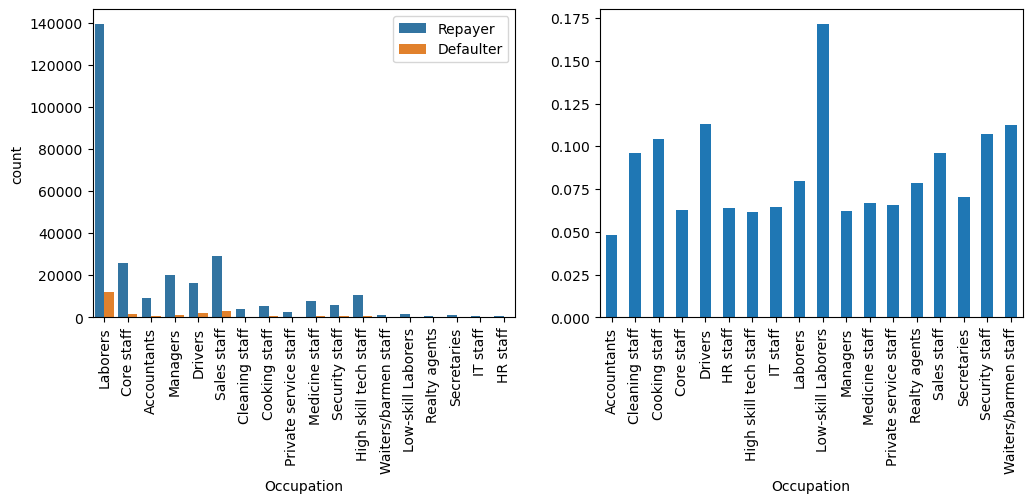

In [77]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=AppData,x="OCCUPATION_TYPE",hue="TARGET")
plt.xticks(rotation=90)
plt.xlabel("Occupation")
plt.legend(['Repayer','Defaulter'])
plt.subplot(1,2,2)
AppData.groupby("OCCUPATION_TYPE")['TARGET'].mean().plot.bar() 
plt.xlabel("Occupation")
plt.xticks(rotation=90)
plt.show()

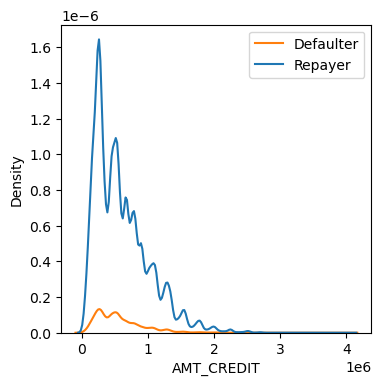

In [78]:
plt.figure(figsize=(4,4))
sns.kdeplot(data=AppData, x="AMT_CREDIT",hue="TARGET")
plt.legend(['Defaulter','Repayer'])
plt.show()

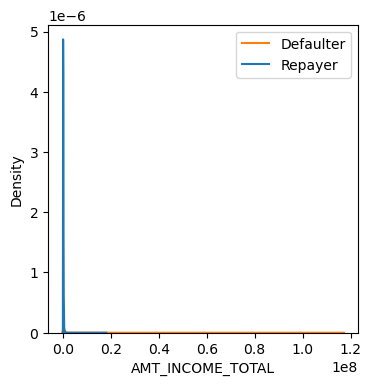

In [79]:
plt.figure(figsize=(4,4))
sns.kdeplot(data=AppData, x="AMT_INCOME_TOTAL",hue="TARGET")
plt.legend(['Defaulter','Repayer'])
plt.show()

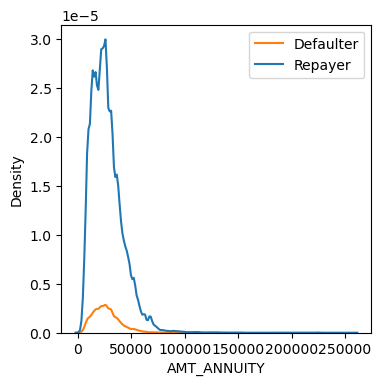

In [80]:
plt.figure(figsize=(4,4))
sns.kdeplot(data=AppData, x="AMT_ANNUITY",hue="TARGET")
plt.legend(['Defaulter','Repayer'])
plt.show()

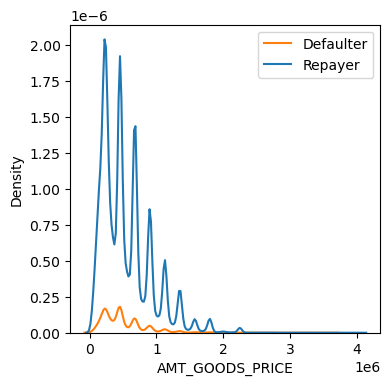

In [81]:
plt.figure(figsize=(4,4))
sns.kdeplot(data=AppData, x="AMT_GOODS_PRICE",hue="TARGET")
plt.legend(['Defaulter','Repayer'])
plt.show()

# BIVARIATE ANALYSIS ON NUMERIAL VARIABLES.
CONCLUSIONS ARE MENTIONED IN THE PPT SUBMITTED. 

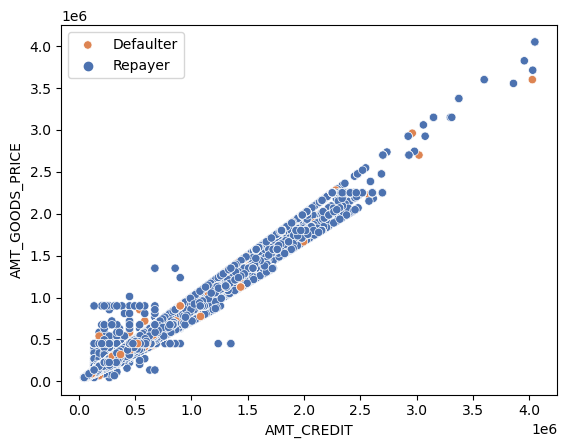

In [82]:
sns.scatterplot(data=AppData,x="AMT_CREDIT",y="AMT_GOODS_PRICE",hue="TARGET",palette="deep")
plt.legend(['Defaulter','Repayer'])
plt.show()

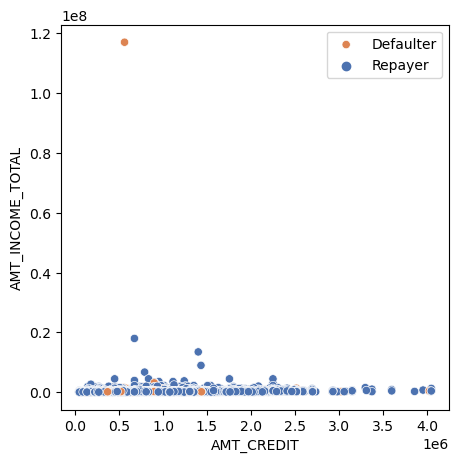

In [83]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=AppData,x="AMT_CREDIT",y="AMT_INCOME_TOTAL",hue="TARGET",palette="deep")
plt.legend(['Defaulter','Repayer'])
plt.show()

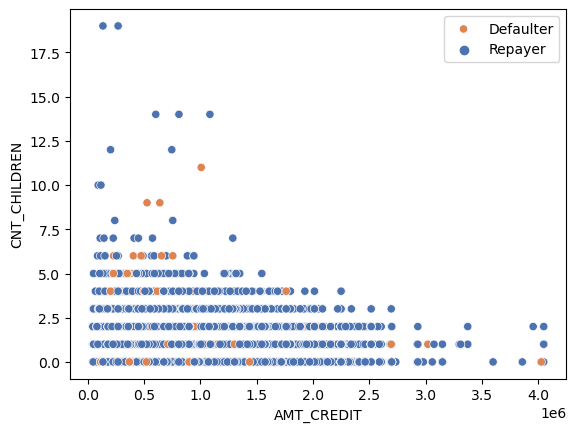

In [84]:
sns.scatterplot(data=AppData,x="AMT_CREDIT",y="CNT_CHILDREN",hue="TARGET",palette="deep")
plt.legend(['Defaulter','Repayer'])
plt.show()

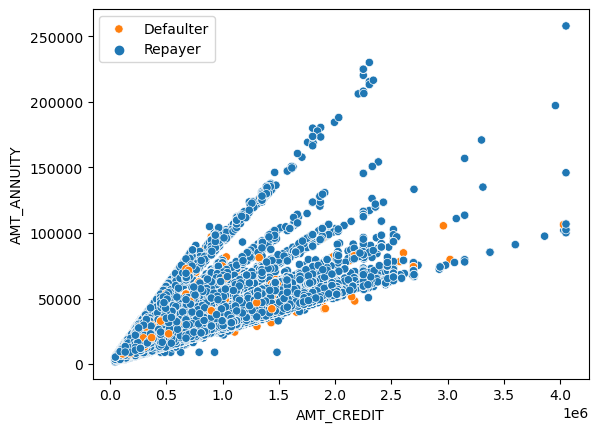

In [85]:
sns.scatterplot(data=AppData,x="AMT_CREDIT",y="AMT_ANNUITY",hue="TARGET")
plt.legend(['Defaulter','Repayer'])
plt.show()

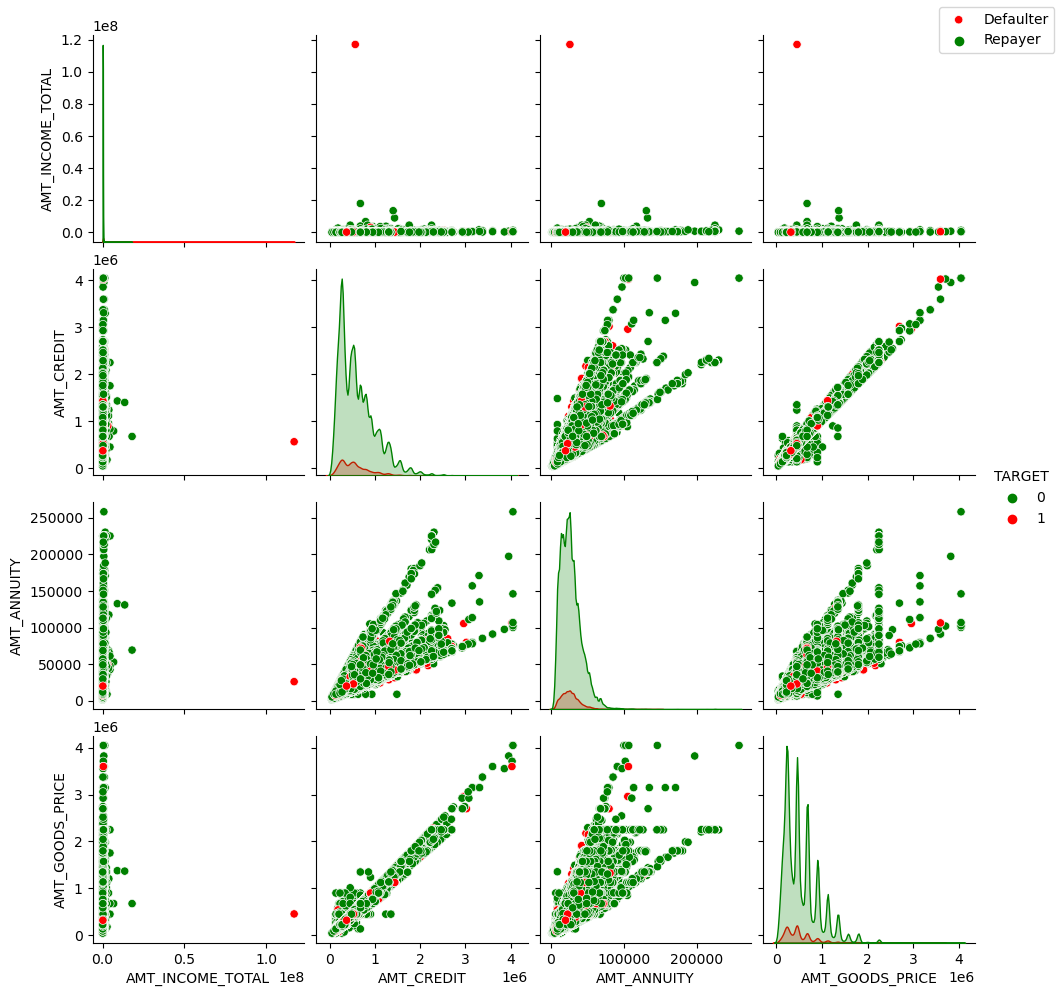

In [86]:
amount = AppData[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Defaulter','Repayer'])
plt.show()

In [87]:
Merged_Info = pd.merge(AppData, PrevApp, how='inner', on='SK_ID_CURR')
Merged_Info.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,LIVINGAREA_MEDI,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Education,Marital,Housing,AMT_GOODS_PRICE_R,AMT_CREDIT_R,AMT_ANNUITY_R,AMT_INCOME_TOTAL_R,DAYS_EMPLOYED_R,DAYS_BIRTH_R,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,0.018801,9461,637,3648.0,2120,7.0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0250,0.0369,0.0193,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,0.0,0.0,0.0,0.0,0.0,1.0,Secondary,Single,House,300000-400000,300000-450000,20000-25000,200000-250000,500-1000,5000-10000,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,0.003541,16765,1188,1186.0,291,7.0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0968,0.0529,0.0558,Block,No,1.0,0.0,1.0,0.0,-828.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Higher education,Married,House,Above 90000,Above 1000000,Above 35000,250000-300000,1000-1500,15000-20000,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,0.003541,16765,1188,1186.0,291,7.0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0968,0.0529,0.0558,Block,No,1.0,0.0,1.0,0.0,-828.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Higher education,Married,House,Above 90000,Above 1000000,Above 35000,250000-300000,1000-1500,15000-20000,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA

In [88]:
Merged_Info.shape

(1413701, 105)

In [89]:
Merged_Info.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,LIVINGAREA_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,616842.000000,1.411880e+06,1.171859e+06,701703.000000,589393.000000,729019.000000,476444.000000,428502.000000,664485.000000,706919.000000,715193.000000,457041.000000,576528.000000,449351.000000,709301.000000,434055.000000,638143.000000,701703.000000,589393.000000,729019.000000,476444.000000,428502.000000,701703.000000,589393.000000,709301.000000,1.410555e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,1.094176e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.106488e+06
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+05,5.875537e+05,2.701583e+04,5.276522e+05,2.074985e-02,1.632105e+04,7.266347e+04,5.003233e+03,3.034563e+03,8.689303e+00,2.150501e+00,2.059638e+00,2.037603e+00,1.198433e+01,1.207327e-02,4.396686e-02,3.604793e-02,7.360538e-02,2.221481e-01,1.740601e-01,0.505499,5.114275e-01,4.896986e-01,0.114978,0.086989,0.977235,0.749643,0.043406,0.075250,0.148725,0.222317,0.228792,0.065614,0.098862,0.104700,0.008608,0.027473,0.112075,0.086271,0.976515,0.757051,0.041537,0.115410,0.086551,0.105888,1.544176e+00,1.540436e-01,1.526303e+00,1.080426e-01,-1.084701e+03,7.073632e-05,5.484894e-03,6.028149e-03,3.410198e-02,2.664913e-01,3.196935e-01,2.575495e+00,1.922744e+06,1.583718e+04,1.752436e+05,1.963541e+05,2.264512e+05,1.247893e+01,9.964321e-01,-8.803670e+02,3.149878e+02,1.605194e+01
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+05,3.849173e+05,1.395147e+04,3.531028e+05,1.334702e-02,4.344557e+03,1.433374e+05,3.551051e+03,1.507376e+03,7.395503e+00,9.006787e-01,4.957797e-01,4.886431e-01,3.232181e+00,1.092132e-01,2.050215e-01,1.864095e-01,2.611277e-01,4.156903e-01,3.791613e-01,0.210748,1.911188e-01,1.965360e-01,0.104870,0.080745,0.061647,0.113048,0.073492,0.130434,0.099005,0.140943,0.158112,0.079438,0.090477,0.107025,0.047742,0.067045,0.104846,0.082634,0.067386,0.109991,0.072112,0.105692,0.080593,0.108645,2.530715e+00,4.658973e-01,2.508953e+00,3.790588e-01,7.999369e+02,8.410194e-03,7.702591e-02,1.001966e-01,2.012902e-01,9.268428e-01,8.781444e-01,2.268756e+00,5.327153e+05,1.472491e+04,2.936222e+05,3.194813e+05,3.159376e+05,3.331474e+00,5.962560e-02,7.835402e+02,7.695082e+03,1.456675e+01
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04

In [90]:
Merged_Info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Columns: 105 entries, SK_ID_CURR to PRODUCT_COMBINATION
dtypes: category(6), float64(49), int64(21), object(29)
memory usage: 1.1+ GB


In [91]:
Rpay = Merged_Info[Merged_Info['TARGET']==0] # Repayers
Dfltr = Merged_Info[Merged_Info['TARGET']==1] # Defaulters

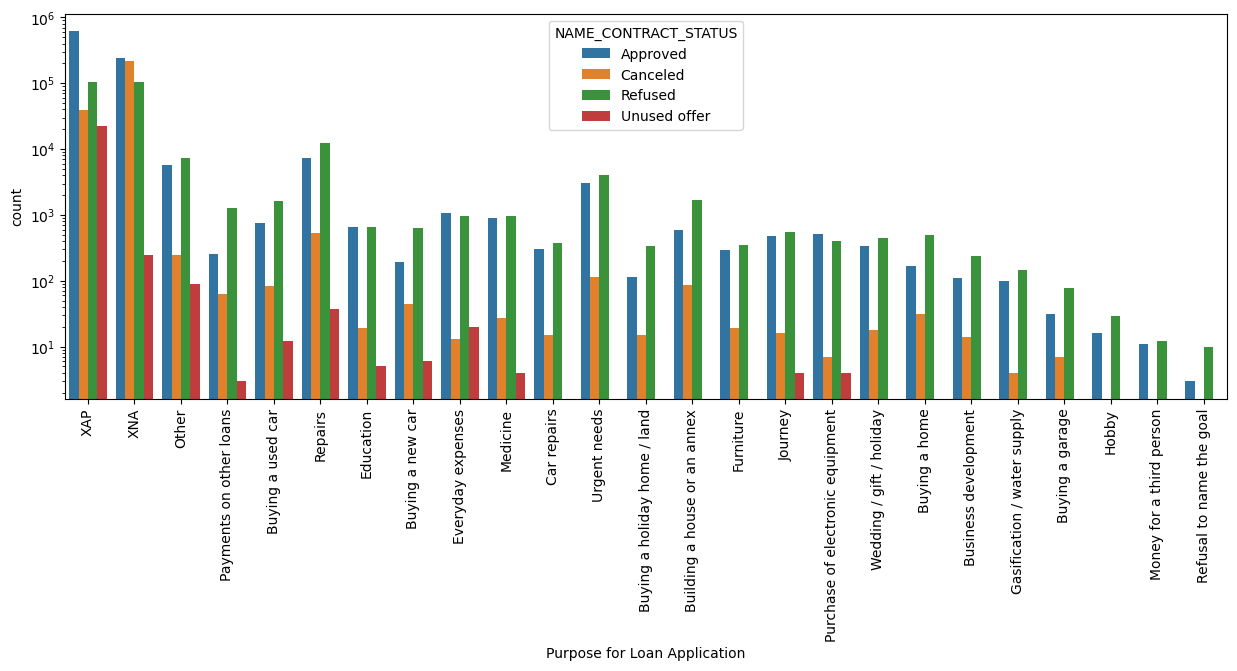

In [92]:
plt.figure(figsize=(15,5))
sns.countplot(data=Merged_Info,x="NAME_CASH_LOAN_PURPOSE",hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90)
plt.yscale("log")
plt.xlabel("Purpose for Loan Application")
plt.show()

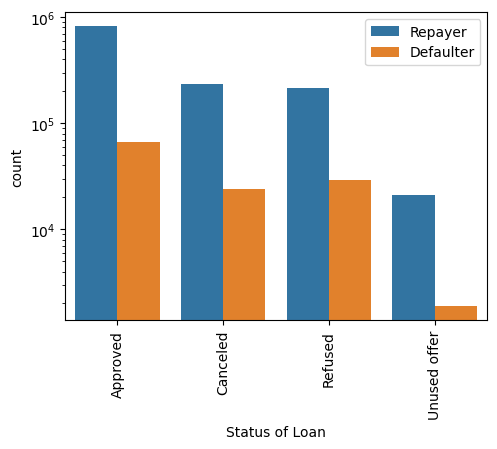

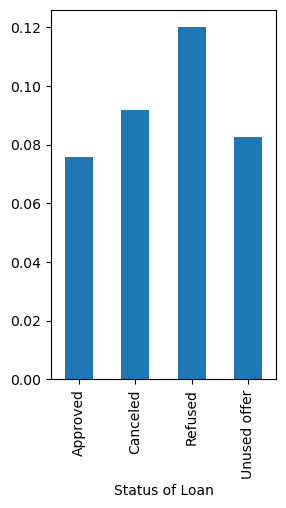

In [93]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=Merged_Info,x="NAME_CONTRACT_STATUS",hue="TARGET")
plt.xticks(rotation=90)
plt.legend(['Repayer','Defaulter'])
plt.xlabel("Status of Loan")
plt.yscale("log")
plt.show()
plt.subplot(1,2,2)
Merged_Info.groupby('NAME_CONTRACT_STATUS')['TARGET'].mean().plot.bar() 
plt.xticks(rotation=90)
plt.xlabel("Status of Loan")
plt.show()